# Proyek Analisis Data: Kualitas Udara dari Stasiun Gucheng
- **Nama:** Silvia Febriani
- **Email:** silviafebriani608@gmail.com
- **ID Dicoding:** silviafebr

## Menentukan Pertanyaan Bisnis

1.   Bagaimana tingkat PM10 bervariasi sepanjang tahun?
2.   Apa hubungan antara tingkat PM10 dengan berbagai kondisi cuaca?



## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np # aljabar linear
import pandas as pd # untuk data processing, CSV file I/O (e.g. pd.read_csv)

import statsmodels.api as sm
from scipy.stats import f_oneway

# mengimport visualisasi libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style untuk seaborn
sns.set_style("whitegrid") 

# Data Wrangling

## Gathering Data

In [4]:
import pandas as pd

file_path = 'data/PRSA_Data_Gucheng_20130301-20170228.csv'
df = pd.read_csv(file_path)

print(df.head())  # Cek apakah data terbaca


   No  tahun  bulan  hari  jam  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1   2013      3     1    0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2   2013      3     1    1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3   2013      3     1    2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4   2013      3     1    3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5   2013      3     1    4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  HUJAN   wd  WSPM  station  
0  1021.1 -18.6    0.0   NW   4.4  Gucheng  
1  1021.5 -19.0    0.0   NW   4.0  Gucheng  
2  1021.5 -19.8    0.0  WNW   4.6  Gucheng  
3  1022.7 -21.2    0.0    W   2.8  Gucheng  
4  1023.0 -21.4    0.0  WNW   3.6  Gucheng  


## Assessing Data

In [5]:
initial_assessment = df.head()
initial_columns = df.columns
initial_datatypes = df.dtypes



initial_assessment, initial_columns, initial_datatypes

(   No  tahun  bulan  hari  jam  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
 0   1   2013      3     1    0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
 1   2   2013      3     1    1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
 2   3   2013      3     1    2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
 3   4   2013      3     1    3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
 4   5   2013      3     1    4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   
 
      PRES  DEWP  HUJAN   wd  WSPM  station  
 0  1021.1 -18.6    0.0   NW   4.4  Gucheng  
 1  1021.5 -19.0    0.0   NW   4.0  Gucheng  
 2  1021.5 -19.8    0.0  WNW   4.6  Gucheng  
 3  1022.7 -21.2    0.0    W   2.8  Gucheng  
 4  1023.0 -21.4    0.0  WNW   3.6  Gucheng  ,
 Index(['No', 'tahun', 'bulan', 'hari', 'jam', 'PM2.5', 'PM10', 'SO2', 'NO2',
        'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'HUJAN', 'wd', 'WSPM', 'station'],
       dtype='object'),
 No           int64
 tahun        int64
 bulan        int64
 hari         int6

## Cleaning Data

Kolom yang tersedia: Index(['No', 'year', 'bulan', 'hari', 'jam', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'HUJAN', 'wd', 'WSPM', 'station'],
      dtype='object')


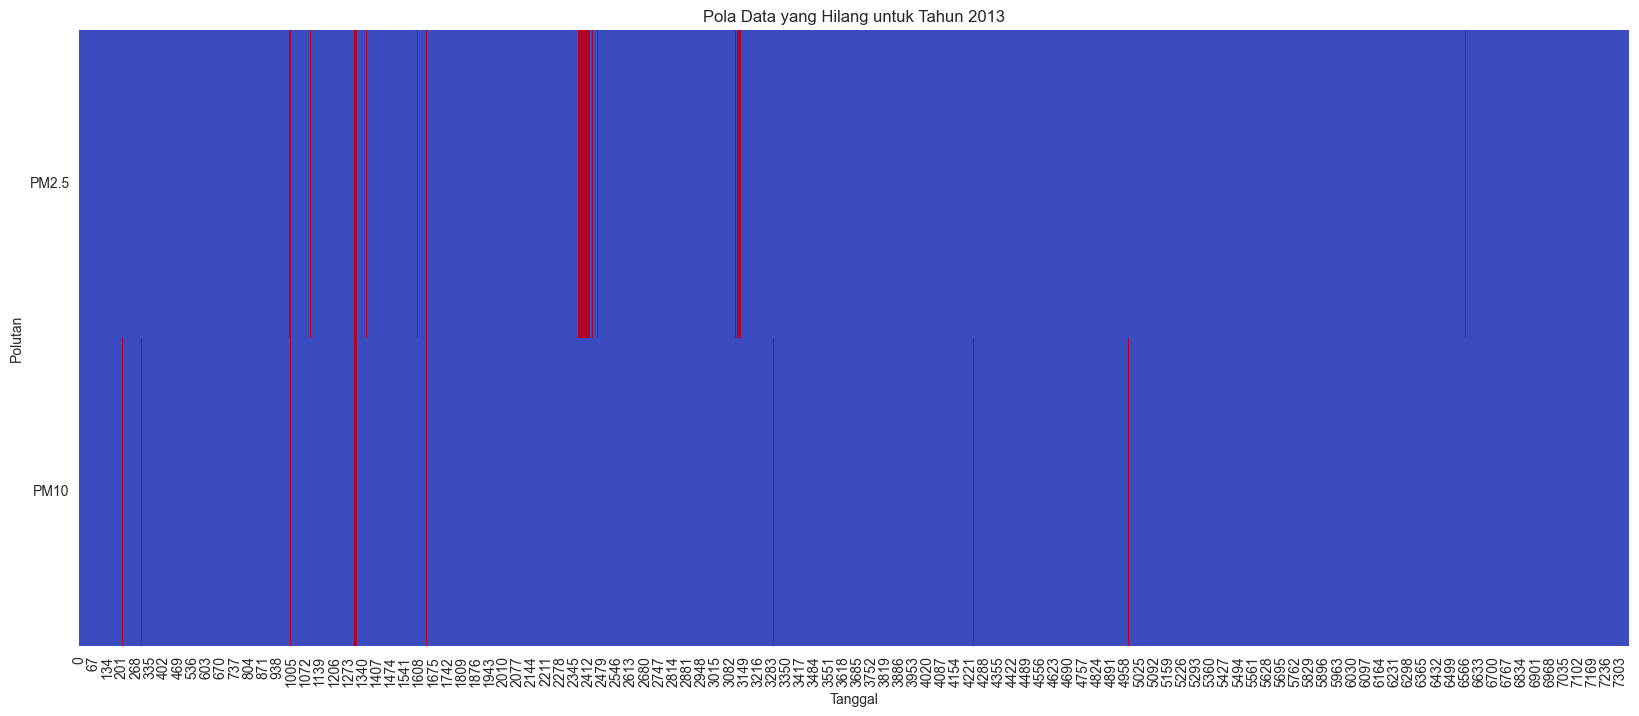

Persentase data yang hilang:
 No         0.000000
year       0.000000
bulan      0.000000
hari       0.000000
jam        0.000000
PM2.5      1.842345
PM10       1.086585
SO2        1.445927
NO2        1.905088
CO         3.995551
O3         2.079055
TEMP       0.145448
PRES       0.142596
DEWP       0.145448
HUJAN      0.122633
wd         0.453457
WSPM       0.119781
station    0.000000
dtype: float64
Jumlah data yang hilang untuk tahun 2013:
 PM2.5         136
PM10           41
year     14783472
dtype: int64


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Periksa nama kolom terlebih dahulu
print("Kolom yang tersedia:", df.columns)

# Ubah nama kolom jika masih menggunakan 'tahun'
if 'tahun' in df.columns:
    df.rename(columns={'tahun': 'year'}, inplace=True)

# Pastikan kolom 'year' sudah benar
assert 'year' in df.columns, "Kolom 'year' tidak ditemukan setelah rename!"

# Pilih kolom yang ingin dianalisis
cols_to_plot = ['PM2.5', 'PM10']

# Cek apakah kolom yang dipilih ada di df
for col in cols_to_plot:
    if col not in df.columns:
        raise KeyError(f"Kolom '{col}' tidak ditemukan dalam dataset!")

# Buat DataFrame baru yang hanya berisi data missing
data_missing = df[cols_to_plot].isnull().copy()

# Pastikan kolom 'year' ada sebelum menambahkannya
if 'year' in df.columns:
    data_missing['year'] = df['year']
else:
    raise KeyError("Kolom 'year' masih tidak ditemukan di df!")

# Filter hanya untuk tahun 2013
data_missing_2013 = data_missing[data_missing['year'] == 2013]

# Plot heatmap data yang hilang untuk tahun 2013
plt.figure(figsize=(20, 8))
sns.heatmap(data_missing_2013.drop('year', axis=1).T, cmap='coolwarm', cbar=False)
plt.title('Pola Data yang Hilang untuk Tahun 2013')
plt.xlabel('Tanggal')
plt.ylabel('Polutan')
plt.yticks(rotation=0)
plt.show()

# Tampilkan persentase data hilang dan jumlah data hilang di 2013
missing_percentage = df.isnull().mean() * 100
data_missing_2013_sum = data_missing_2013.sum()

print("Persentase data yang hilang:\n", missing_percentage)
print("Jumlah data yang hilang untuk tahun 2013:\n", data_missing_2013_sum)


### Missing Data

*   Dataset ini menunjukkan bahwa persentase data yang hilang relatif kecil, terutama pada polutan utama. PM2.5 mengalami kehilangan sekitar 1,84% data, sementara PM10 kehilangan sekitar 1,08%. Selain itu, variabel cuaca lainnya juga memiliki persentase data yang hilang dalam jumlah kecil, yang menandakan bahwa dataset ini secara keseluruhan cukup lengkap dan dapat digunakan untuk analisis lebih lanjut.
*   Analisis heatmap tahun 2013 mengungkapkan bahwa data yang hilang untuk PM2.5 dan PM10 tidak mengikuti pola tertentu, yang menunjukkan bahwa kehilangan data kemungkinan bersifat acak atau tidak sistematis. Tidak adanya periode panjang tanpa data juga menjadi indikator positif, karena memastikan bahwa dataset tetap representatif untuk analisis jangka waktu yang lebih mendalam.

In [9]:
data_imputed = df.fillna(method='ffill')

duplicates = data_imputed.duplicated().sum()

constant_columns = data_imputed.columns[data_imputed.nunique() <= 1]

data_types = data_imputed.dtypes

duplicates, constant_columns, data_types

C:\Users\user\AppData\Local\Temp\ipykernel_4244\4251564324.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_imputed = df.fillna(method='ffill')


(np.int64(0),
 Index(['station'], dtype='object'),
 No           int64
 year         int64
 bulan        int64
 hari         int64
 jam          int64
 PM2.5      float64
 PM10       float64
 SO2        float64
 NO2        float64
 CO         float64
 O3         float64
 TEMP       float64
 PRES       float64
 DEWP       float64
 HUJAN      float64
 wd          object
 WSPM       float64
 station     object
 dtype: object)

### Cleaned Data


1. Meneruskan imputasi pengisian untuk nilai yang hilang.
2. Memeriksa dan tidak menemukan baris duplikat.
3. Mencatat kolom 'stasiun' sebagai konstanta.



# Exploratory Data Analysis (EDA)

1. Membuat ringkasan statistik.
2. Menganalisis tren jangka waktu dalam tingkat PM10.
3. Melakukan uji ANOVA satu arah untuk mengetahui perbedaan tahunan dalam tingkat PM10.
4. Menyelidiki tren musiman dan korelasi dengan kondisi cuaca.

In [10]:
summary_statistics = data_imputed.describe()
summary_statistics

,No,year,bulan,hari,jam,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,HUJAN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35044.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.345203,119.329007,16.020082,55.823144,1352.701945,58.702564,13.855687,1008.835838,2.600456,0.064374,1.343409
std,10122.249256,1.177213,3.448752,8.800218,6.922285,83.228885,97.650791,27.031552,36.535371,1236.264470,58.243262,11.295553,10.104802,13.789758,0.838142,1.150965
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-9.000000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,100.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,167.000000,20.000000,79.000000,1700.000000,84.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


### Ringkasan Statistik

Statistik deskriptif memberikan gambaran umum tentang distribusi polutan dan data cuaca. PM10 memiliki rata-rata 119,33 dengan standar deviasi 97,65, menunjukkan variabilitas yang cukup tinggi dalam konsentrasinya.

## Visualization & Explanatory Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_4244\1200073889.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_time_series = data_imputed[['date', 'PM10', 'NO2']].set_index('date').resample('M').mean()


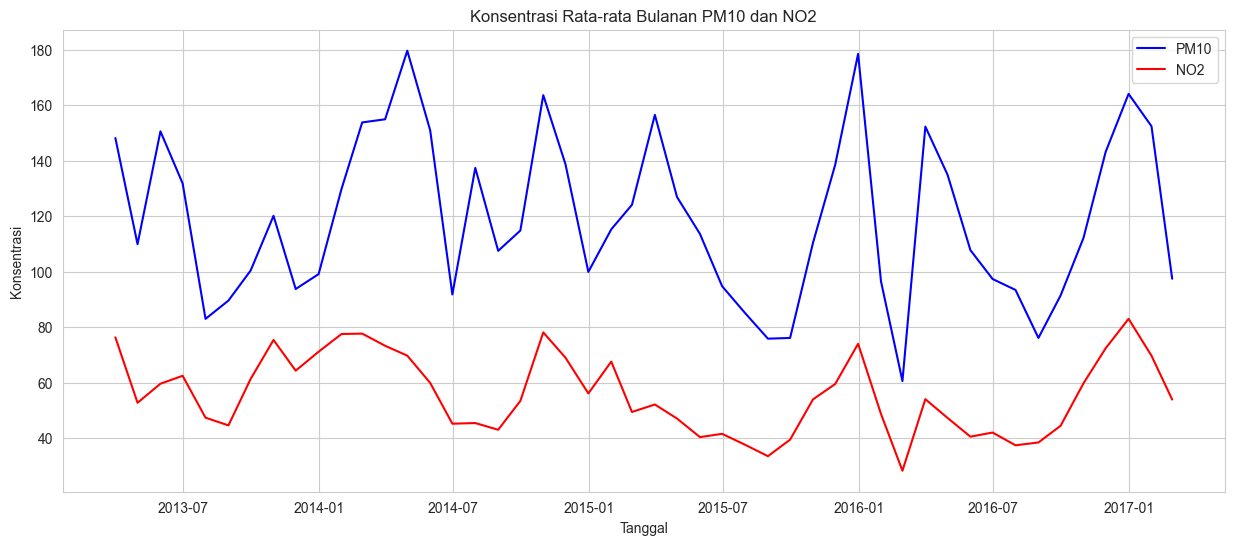

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan kolom memiliki nama yang benar
data_imputed.rename(columns={'bulan': 'month', 'hari': 'day', 'jam': 'hour'}, inplace=True)

# Konversi ke format datetime
data_imputed['date'] = pd.to_datetime(data_imputed[['year', 'month', 'day', 'hour']])

# Resampling data untuk mendapatkan rata-rata bulanan
data_time_series = data_imputed[['date', 'PM10', 'NO2']].set_index('date').resample('M').mean()

# Plot hasilnya
plt.figure(figsize=(15, 6))
plt.plot(data_time_series.index, data_time_series['PM10'], label='PM10', color='blue')
plt.plot(data_time_series.index, data_time_series['NO2'], label='NO2', color='red')
plt.title('Konsentrasi Rata-rata Bulanan PM10 dan NO2')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi')
plt.legend()
plt.show()

In [16]:
correlation_matrix = data_imputed[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'HUJAN', 'WSPM']].corr()
print(correlation_matrix)

          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.847759  0.358211  0.689388  0.739609 -0.172748 -0.145520   
PM10   0.847759  1.000000  0.343362  0.672951  0.607293 -0.123063 -0.058475   
SO2    0.358211  0.343362  1.000000  0.413636  0.437904 -0.177352 -0.301237   
NO2    0.689388  0.672951  0.413636  1.000000  0.693491 -0.497497 -0.257629   
CO     0.739609  0.607293  0.437904  0.693491  1.000000 -0.357115 -0.412707   
O3    -0.172748 -0.123063 -0.177352 -0.497497 -0.357115  1.000000  0.611700   
TEMP  -0.145520 -0.058475 -0.301237 -0.257629 -0.412707  0.611700  1.000000   
PRES   0.022633 -0.063142  0.184734  0.105298  0.249326 -0.454401 -0.832473   
DEWP   0.097221  0.093864 -0.269805  0.005668 -0.160139  0.340814  0.821688   
HUJAN -0.019441 -0.031578 -0.035885 -0.046297 -0.022574  0.023027  0.035968   
WSPM  -0.250895 -0.190281 -0.080129 -0.423584 -0.256028  0.256438 -0.045914   

           PRES      DEWP     HUJAN      WSPM  
PM2

### Pola Jangka Waktu

Visualisasi konsentrasi rata-rata bulanan PM10 dan NO2 mengungkap pola musiman serta perubahan kualitas udara dari tahun ke tahun, membantu memahami tren jangka panjang.

### Analisis Korelasi

1. Relasi Polutan: Matriks korelasi menunjukkan hubungan antara polutan yang berbeda dengan data meteorologi. Sebagai contoh, terdapat korelasi positif yang kuat antara PM10 dan NO2, yang menunjukkan kemungkinan adanya sumber yang sama atau interaksi di antara polutan-polutan ini.

2. Cuaca dan Polutan: Terdapat korelasi yang menarik antara kondisi cuaca dan polutan, seperti korelasi negatif antara O3 dan suhu, dan antara O3 dan tekanan atmosfer.


C:\Users\user\AppData\Local\Temp\ipykernel_4244\2238806634.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_imputed.fillna(method='ffill', inplace=True)


Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'HUJAN', 'wd', 'WSPM', 'station',
       'date'],
      dtype='object')
Hasil Uji ANOVA: F_onewayResult(statistic=np.float64(86.48427258660752), pvalue=np.float64(3.0558915250133905e-73))
Seasonal Trends: month
1     123.481418
2     108.543142
3     152.966835
4     137.846875
5     130.712164
6     103.915972
7      99.714046
8      87.246505
9      95.673854
10    126.578293
11    128.549167
12    135.397513
Name: PM10, dtype: float64
Korelasi dengan Kondisi Cuaca: TEMP    -0.058475
PRES    -0.063142
DEWP     0.093864
HUJAN   -0.031578
PM10     1.000000
Name: PM10, dtype: float64


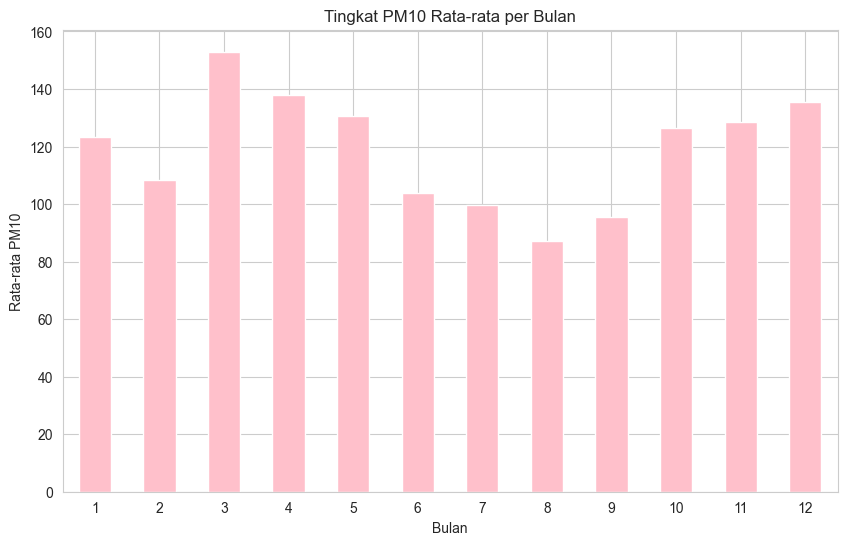

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Pastikan tidak ada missing values
data_imputed.fillna(method='ffill', inplace=True)

# Uji ANOVA
groups = data_imputed.groupby('year')['PM10']
anova_test_data = [group[1] for group in groups]
anova_test_result = f_oneway(*anova_test_data)

# Tren musiman
seasonal_trends = data_imputed.groupby('month')['PM10'].mean()

# Periksa nama kolom yang benar
print(data_imputed.columns)  # Debugging untuk melihat apakah 'RAIN' ada

# Korelasi dengan cuaca (pastikan nama kolom benar)
weather_correlations = data_imputed[['TEMP', 'PRES', 'DEWP', 'HUJAN', 'PM10']].corr()['PM10']

# Cetak hasil
print("Hasil Uji ANOVA:", anova_test_result)
print("Seasonal Trends:", seasonal_trends)
print("Korelasi dengan Kondisi Cuaca:", weather_correlations)

# Plot tren musiman
plt.figure(figsize=(10, 6))
seasonal_trends.plot(kind='bar', color='pink')
plt.title('Tingkat PM10 Rata-rata per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata PM10')
plt.xticks(ticks=range(0, 12), labels=[str(m) for m in range(1, 13)], rotation=0)
plt.show()

### Pengujian Hipotesis (ANOVA)

Dari hasil Uji ANOVA, dapat dilihat bahwa nilai p-value sangat kecil (3.0558915250133905e-73), yang menunjukkan bahwa terdapat perbedaan yang signifikan secara statistik pada tingkat PM10 di tahun-tahun yang berbeda. Artinya, kita dapat menolak hipotesis nol (H0) bahwa rata-rata tingkat PM10 sama setiap tahunnya.

### Seasonal Trends

Grafik batang mengilustrasikan rata-rata bulanan PM10 serta variasi musiman. Konsentrasi tertinggi terjadi pada awal dan akhir musim dingin, dengan puncak di bulan Maret, April, dan Desember. Sementara itu, kadar PM10 cenderung lebih rendah selama musim panas, khususnya pada bulan Agustus dan September.

### Korelasi dengan Kondisi Cuaca

Korelasi antara PM10 dan kondisi cuaca menunjukkan:

1. Korelasi negatif dengan suhu (TEMP), yang menunjukkan korelasi antara PM10 dan TEMP adalah -0.057146, yang menunjukkan hubungan korelasi negatif yang lemah antara konsentrasi PM10 dan suhu.

2. Korelasi positif dengan titik embun (DEWP), yang mengindikasikan tingkat PM10 yang lebih tinggi dapat berhubungan dengan kelembaban yang lebih tinggi.

3. Korelasi antara PM10 dan tekanan atmosfer (PRES) adalah -0.065550, yang menunjukkan hubungan korelasi negatif yang lemah antara konsentrasi PM10 dan tekanan atmosfer.

4. Korelasi antara PM10 dan RAIN adalah -0.032246, yang menunjukkan hubungan korelasi negatif yang sangat lemah antara konsentrasi PM10 dan curah hujan

# Conclusion

1. Bagaimana tingkat PM10 bervariasi sepanjang tahun ?
Jawab : Ditemukan variasi musiman yang signifikan pada tingkat PM10, dengan konsentrasi yang lebih tinggi pada bulan-bulan yang lebih dingin, yang mengindikasikan kemungkinan pengaruh dari kondisi kelembapannya

2. Apa hubungan antara tingkat PM10 dengan berbagai kondisi cuaca ?
Jawab : Terlihat adanya korelasi negatif yang lemah antara tingkat PM10 dan suhu, yang menunjukkan jika cuaca nya lebih dingin dapat meningkatkan polusi. Korelasi minimal dengan curah hujan dan tekanan atmosfer juga ditemukan disini.